<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2023-03-05 21:12:58--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2023-03-05 21:12:58--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.02s   

2023-03-05 21:12:58 (19.2 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2023-03-05 21:12:58--
Total wall clock time: 0.3s
Downloaded: 1 files, 418K in 0.02s (19.2 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [18]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

# Al correr las líneas de la celda [3] se puede observar que no hay Nan ni en la columna Height ni Weight. 
# Pero como la consigna pide que igual se escriba el procedimiento, se lo muestra a continuación.

# Se hace una copia del dataframe
df_2 = df.copy()

# Para eliminar los datos faltantes, se implementará el método dropna, indicando 
# La columna a borrar
df_2.dropna(subset=["Height"], inplace=True)
df_2.dropna(subset=["Weight"], inplace=True)

In [19]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

# Se muestran las 5 primeras filas del DataFrame df para ver su formato.
df_2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilogramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)


df_2.columns = ["sexo", "altura(mt)", "peso(kg)"]

df_2["altura(mt)"] = df_2["altura(mt)"].apply(lambda x: x*0.0254)

df_2["sexo"] = df_2["sexo"].apply(lambda x: "masculino" if x == "Male" else "femenino") 

df_2["peso(kg)"] = df_2["peso(kg)"].apply(lambda x: x*0.453592)


df_2.head()

,sexo,altura(mt),peso(kg)
0,masculino,1.875714,109.720985
1,masculino,1.747060,73.622732
2,masculino,1.882397,96.497550
3,masculino,1.821967,99.809504
4,masculino,1.774998,93.598619


In [30]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

df_3 = df_2.copy()

print('Cantidad de datos en observacion:', df_3.shape[0])

Cantidad de datos en observacion: 10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

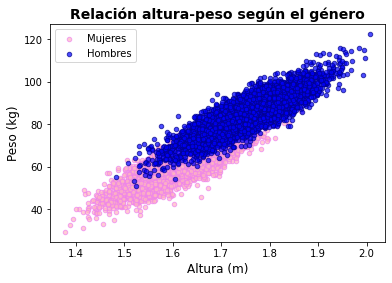

In [86]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

# Lo primero que se hace es separar al dataset "df_3" en datasets por tipo de género.
df_fem = df_3[df_3["sexo"] == "femenino"]
df_masc = df_3[df_3["sexo"] == "masculino"]

# Se crea el espacio para dibujar con fig = plt.figure()
# Se crea el espacio para el gráfico ax = fig.add_subplot()


fig = plt.figure()
ax = fig.add_subplot()
df_fem.plot.scatter(["altura(mt)"], ["peso(kg)"], color='lightpink', ax=ax, label = "Mujeres", ec="violet", alpha=0.7)
df_masc.plot.scatter(["altura(mt)"], ["peso(kg)"], color='blue', ax=ax, label = "Hombres", ec = "darkblue",alpha=0.7)
ax.set_title("Relación altura-peso según el género", fontsize = 14, fontweight="bold")
ax.set_xlabel("Altura (m)",fontsize = 12)
ax.set_ylabel("Peso (kg)", fontsize = 12)
ax.legend()
plt.show()

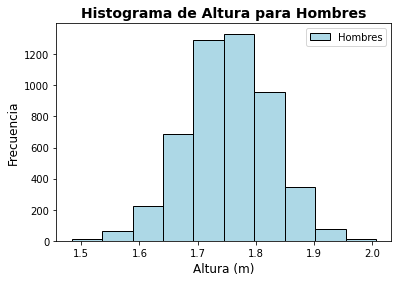

Valor Medio: 1.75


In [62]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

# Histograma
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(df_masc["altura(mt)"], bins = None,color="lightblue",ec='black', label = "Hombres")
ax.set_title("Histograma de Altura para Hombres", fontsize = 14, fontweight="bold")
ax.set_xlabel("Altura (m)",fontsize = 12)
ax.set_ylabel("Frecuencia",fontsize = 12)
ax.legend()
plt.show()

# Valor Medio
media = np.mean(df_masc["altura(mt)"])
print(f"Valor Medio: {media:.2f}")

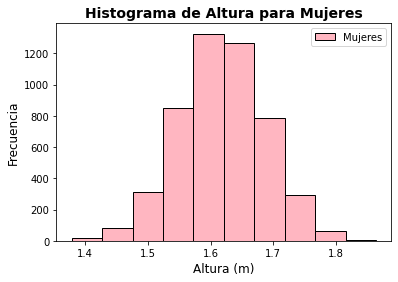

Valor Medio: 1.62


In [63]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio

# Histograma
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(df_fem["altura(mt)"], bins = None,color="lightpink",ec='black', label = "Mujeres")
ax.set_title("Histograma de Altura para Mujeres", fontsize = 14, fontweight="bold")
ax.set_xlabel("Altura (m)",fontsize = 12)
ax.set_ylabel("Frecuencia",fontsize = 12)
ax.legend()

plt.show()

# Valor Medio
media = np.mean(df_fem["altura(mt)"])
print(f"Valor Medio: {media:.2f}")

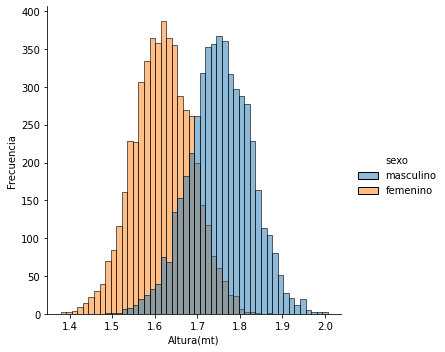

In [98]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

ax = sns.displot(data= df_3, x= "altura(mt)", hue= "sexo")
ax.set(xlabel="Altura(mt)", ylabel="Frecuencia")

plt.show()


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


Coeficiente de determinación R2: 0.75
Un R2 de 0,75 es dentro de todo aceptable.


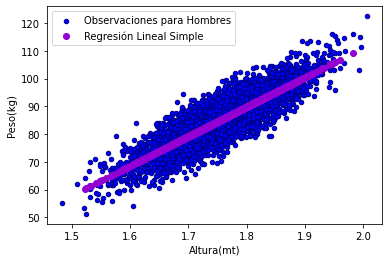

In [108]:
# Alumno:
# Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal 
# que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. 
# Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.


################### ANÁLISIS PARA HOMBRES ###################

# Pasor a seguir:
# - Obtener las variables X e y (para masculino)

x = df_masc[["altura(mt)"]].values

y = df_masc["peso(kg)"].values

# - Dividir el dataset en train y test 70%30%

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# - Entrenar un modelo de regresión

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

y_hat= lr.predict(x_test)

# - Calcular la métrica r2_score del modelo (y_hat vs y_test)

from sklearn.metrics import r2_score

value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación R2: {value:.2f}")
print("Un R2 de 0,75 es dentro de todo aceptable.")

# - Dibujar el resultado de la regresion sobre los datos de entrada

fig = plt.figure()
ax = fig.add_subplot()
df_masc.plot.scatter(["altura(mt)"], ["peso(kg)"], color='b', ax=ax, ec="darkBlue", label="Observaciones para Hombres")
ax.scatter(x_test,y_hat, color='darkViolet', label="Regresión Lineal Simple")
ax.set(xlabel="Altura(mt)", ylabel="Peso(kg)")
ax.legend()
plt.show()



Coeficiente de determinación R2: 0.73
Un R2 de 0,73 es dentro de todo aceptable.


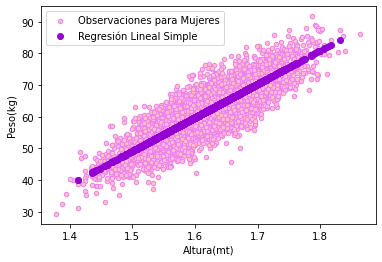

In [110]:
################### ANÁLISIS PARA MUJERES ###################

# Pasor a seguir:
# - Obtener las variables X e y (para femenino)

x = df_fem[["altura(mt)"]].values

y = df_fem["peso(kg)"].values

# - Dividir el dataset en train y test 70%30%

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# - Entrenar un modelo de regresión

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

y_hat= lr.predict(x_test)

# - Calcular la métrica r2_score del modelo (y_hat vs y_test)

from sklearn.metrics import r2_score

value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación R2: {value:.2f}")
print("Un R2 de 0,73 es dentro de todo aceptable.")

# - Dibujar el resultado de la regresion sobre los datos de entrada

fig = plt.figure()
ax = fig.add_subplot()
df_fem.plot.scatter(["altura(mt)"], ["peso(kg)"], color='pink', ax=ax, ec="violet", label="Observaciones para Mujeres")
ax.scatter(x_test,y_hat, color='darkViolet', label="Regresión Lineal Simple")
ax.set(xlabel="Altura(mt)", ylabel="Peso(kg)")
ax.legend()
plt.show()


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">